In [8]:
import data_load_for_Bert as dlfb
import BERT_pretraining_single
import Utility
from torch import nn
import data_load_for_Transformer as dlft 
import BERTModel
import imp
imp.reload(BERT_pretraining_single)

<module 'BERT_pretraining_single' from 'e:\\ML\\chatbot\\BERTChatbot\\BERT_pretraining_single.py'>

In [9]:
num_hiddens, num_layers, dropout, batch_size, num_steps = 32, 2, 0.1, 128, 16
lr, num_epochs, device = 0.001, 2000, Utility.try_gpu()
ffn_num_input, ffn_num_hiddens, num_heads = 32, 64, 4
key_size, query_size, value_size = 32, 32, 32
norm_shape = [32]

In [3]:
train_iter, vocab = dlfb.load_data_xhj(batch_size, num_steps)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\RuiLi\AppData\Local\Temp\jieba.cache
Using 'word' as tokens
Loading model cost 0.573 seconds.
Prefix dict has been built succesfully.


In [10]:
print(vocab.to_tokens([0,1,2,3,4,5,6,7,8,9]))

['<unk>', '<pad>', '<mask>', '<bos>', '<eos>', '你', '我', '的', '了', '是']


In [11]:
len(vocab)

81427

In [12]:

bert = BERTModel.BERTModel(len(vocab), num_hiddens=num_hiddens, norm_shape=norm_shape, ffn_num_input=ffn_num_input, ffn_num_hiddens=ffn_num_hiddens, num_heads=num_heads, num_layers=num_layers, dropout=dropout, key_size=key_size, query_size=query_size, value_size=value_size, hid_in_features=value_size, mlm_in_features=value_size, nsp_in_features=value_size)

device = Utility.try_gpu()
loss = nn.CrossEntropyLoss()

MLM loss 0.034
5393.2 sentence pairs/sec on cuda:0


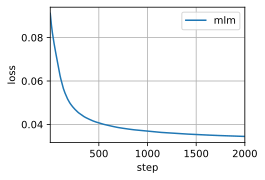

In [13]:
BERT_pretraining_single.train_bert(train_iter, bert, loss, len(vocab), device, num_epochs, lr)